<a href="https://colab.research.google.com/github/anshupandey/Generative-AI-for-Professionals/blob/main/EY2024/C9_LangChain_Chain_reflection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reflection


In the context of LLM agent building, reflection refers to the process of prompting an LLM to observe its past steps (along with potential observations from tools/the environment) to assess the quality of the chosen actions.
This is then used downstream for things like re-planning, search, or evaluation.

![Reflection](https://github.com/anshupandey/AI_Agents/blob/img/reflection.png?raw=1)

This notebook demonstrates a very simple form of reflection in LangGraph.

#### Prerequisites

We will be using a basic agent with a search tool here.

In [ ]:
!pip install -q -U langchain-core langchain-community langgraph langchain-openai
!pip install -q -U httpx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.2/374.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
api_key = "xxxxxxxxxxxxxxxx"
api_version = "2024-02-01"
azure_endpoint = "https://xxxxxx.openai.azure.com/"
model_name = "gpt-4o"

import os
os.environ["OPENAI_API_VERSION"] = api_version
os.environ["AZURE_OPENAI_ENDPOINT"] = azure_endpoint
os.environ["AZURE_OPENAI_API_KEY"] = api_key
os.environ["OPENWEATHERMAP_API_KEY"] = "29af1cea50a401d8e624eea4660b3f59"
os.environ["AZURE_OPENAI_API_VERSION"] = api_version

## Generate

For our example, we will create a "5 paragraph essay" generator. First, create the generator:


In [ ]:
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import AzureChatOpenAI

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an essay assistant tasked with writing excellent 5-paragraph essays."
            " Generate the best essay possible for the user's request."
            " If the user provides critique, respond with a revised version of your previous attempts.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)


chatmodel = AzureChatOpenAI(model=model_name,temperature=0.5)

generate = prompt | chatmodel

In [ ]:
essay = ""
request = HumanMessage(
    content="Write an essay on why the little prince is relevant in modern childhood"
)
for chunk in generate.stream({"messages": [request]}):
    print(chunk.content, end="")
    essay += chunk.content

Antoine de Saint-Exupéry's "The Little Prince" is a timeless literary masterpiece that continues to hold significant relevance in modern childhood. This enchanting novella, first published in 1943, transcends generations with its profound lessons on love, friendship, and the essence of human connections. Despite the rapid technological advancements and societal changes that characterize the 21st century, "The Little Prince" remains a poignant and essential read for children today. Its relevance can be attributed to its exploration of universal themes, its ability to foster emotional intelligence, and its encouragement of imagination and creativity.

Firstly, "The Little Prince" delves into universal themes that resonate with both children and adults. The story's exploration of love, loss, and the importance of human connections are themes that are timeless and universal. In an age where digital interactions often replace face-to-face communication, the novella serves as a gentle remind

In [ ]:
essay

'Antoine de Saint-Exupéry\'s "The Little Prince" is a timeless literary masterpiece that continues to hold significant relevance in modern childhood. This enchanting novella, first published in 1943, transcends generations with its profound lessons on love, friendship, and the essence of human connections. Despite the rapid technological advancements and societal changes that characterize the 21st century, "The Little Prince" remains a poignant and essential read for children today. Its relevance can be attributed to its exploration of universal themes, its ability to foster emotional intelligence, and its encouragement of imagination and creativity.\n\nFirstly, "The Little Prince" delves into universal themes that resonate with both children and adults. The story\'s exploration of love, loss, and the importance of human connections are themes that are timeless and universal. In an age where digital interactions often replace face-to-face communication, the novella serves as a gentle r

### Reflect

In [ ]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a teacher grading an essay submission. Generate critique and recommendations for the user's submission."
            " Provide detailed recommendations, including requests for length, depth, style, etc.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
chatmodel = AzureChatOpenAI(model=model_name,temperature=0.5)
reflect = reflection_prompt | chatmodel

In [ ]:
reflection = ""
for chunk in reflect.stream({"messages": [HumanMessage(content=request.content + "\n" + essay)]}):
    print(chunk.content, end="")
    reflection += chunk.content

Your essay on the relevance of "The Little Prince" in modern childhood is well-structured and insightful, touching on key themes such as universal lessons, emotional intelligence, and creativity. Here are some detailed critiques and recommendations to further enhance your submission:

### Strengths:
1. **Clear Thesis**: Your thesis is clear and well-articulated, setting the stage for the subsequent arguments.
2. **Organization**: The essay is well-organized, with each paragraph focusing on a specific point that supports your thesis.
3. **Content**: You effectively highlight the universal themes, emotional intelligence, and creativity encouraged by "The Little Prince."

### Recommendations for Improvement:

1. **Depth of Analysis**:
   - **Expand on Examples**: While you mention the Little Prince's bond with the rose and his friendship with the fox, you could delve deeper into these relationships. For instance, explore how these relationships specifically teach children about love and l

In [ ]:
reflection

'Your essay on the relevance of "The Little Prince" in modern childhood is well-structured and insightful, touching on key themes such as universal lessons, emotional intelligence, and creativity. Here are some detailed critiques and recommendations to further enhance your submission:\n\n### Strengths:\n1. **Clear Thesis**: Your thesis is clear and well-articulated, setting the stage for the subsequent arguments.\n2. **Organization**: The essay is well-organized, with each paragraph focusing on a specific point that supports your thesis.\n3. **Content**: You effectively highlight the universal themes, emotional intelligence, and creativity encouraged by "The Little Prince."\n\n### Recommendations for Improvement:\n\n1. **Depth of Analysis**:\n   - **Expand on Examples**: While you mention the Little Prince\'s bond with the rose and his friendship with the fox, you could delve deeper into these relationships. For instance, explore how these relationships specifically teach children abou

### Repeat

And... that's all there is too it! You can repeat in a loop for a fixed number of steps, or use an LLM (or other check) to decide when the finished product is good enough.

In [ ]:
for chunk in generate.stream(
    {"messages": [request, AIMessage(content=essay), HumanMessage(content=reflection)]}
):
    print(chunk.content, end="")

Antoine de Saint-Exupéry's "The Little Prince," first published in 1943, is more than just a children's book; it is a timeless narrative that continues to resonate deeply with modern readers of all ages. Set against the backdrop of a young prince's interstellar journey, this novella explores profound themes of love, friendship, and human connection. Despite the rapid technological advancements and societal changes that characterize the 21st century, "The Little Prince" remains a poignant and essential read for children today. Its relevance can be attributed to its exploration of universal themes, its ability to foster emotional intelligence, and its encouragement of imagination and creativity.

Firstly, "The Little Prince" delves into universal themes that resonate with both children and adults. The story's exploration of love, loss, and the importance of human connections are themes that are timeless and universal. For instance, the Little Prince's bond with his rose teaches children 

## Define graph

Now that we've shown each step in isolation, we can wire it up in a graph.

In [ ]:
from typing import List, Sequence

from langgraph.graph import END, MessageGraph, START
import time

async def generation_node(state: Sequence[BaseMessage]):
    return await generate.ainvoke({"messages": state})


async def reflection_node(messages: Sequence[BaseMessage]) -> List[BaseMessage]:
    # Other messages we need to adjust
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    time.sleep(30)
    # First message is the original user request. We hold it the same for all nodes
    translated =  [
        cls_map[msg.type](content=msg.content) for msg in messages[1:]
    ]
    res = await reflect.ainvoke({"messages": translated})
    # We treat the output of this as human feedback for the generator
    return HumanMessage(content=res.content)


builder = MessageGraph()
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.add_edge(START, "generate")


def should_continue(state: List[BaseMessage]):
    if len(state) > 6:
        # End after 3 iterations
        return END
    return "reflect"


builder.add_conditional_edges("generate", should_continue)
builder.add_edge("reflect", "generate")
graph = builder.compile()

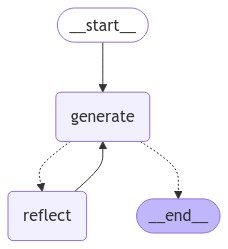

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
async for event in graph.astream(
    [
        HumanMessage(
            content="Generate an essay on the topicality of The Little Prince and its message in modern life"
        )
    ],
):
    ChatPromptTemplate.from_messages(event).pretty_print()
    print(list(event.values())[0].content)
    print("---")

================================ Human Message =================================

generate
**The Timeless Relevance of "The Little Prince" in Modern Life**

Antoine de Saint-Exupéry's "The Little Prince" is a literary gem that transcends time and space, offering profound insights into human nature, relationships, and the essence of life. Written in 1943, this novella has captivated readers of all ages with its simple yet poignant storytelling. Despite the passage of decades, the themes and messages embedded within "The Little Prince" remain remarkably relevant in contemporary society. This essay explores the enduring topicality of the novella, focusing on its reflections on materialism, the importance of human connections, and the wisdom of seeing with the heart.

In today's fast-paced, consumer-driven world, the critique of materialism presented in "The Little Prince" is more pertinent than ever. The story introduces several characters who are preoccupied with wealth, power, and super

In [ ]:
list(event.values())[0].content

'**The Timeless Relevance of "The Little Prince" in Modern Life**\n\n"One sees clearly only with the heart. What is essential is invisible to the eye." This evocative quote from Antoine de Saint-Exupéry\'s "The Little Prince" encapsulates the novella\'s enduring wisdom. Written in 1943, "The Little Prince" continues to resonate with readers across generations, offering profound insights into human nature, relationships, and the essence of life. In our fast-paced, consumer-driven world, the themes and messages embedded within this literary gem remain remarkably relevant. This essay explores the timeless relevance of "The Little Prince," focusing on its reflections on materialism, the importance of genuine human connections, and the wisdom of seeing with the heart.\n\nIn today\'s society, where material wealth and status symbols often dominate, the critique of materialism presented in "The Little Prince" is more pertinent than ever. The story introduces characters like the businessman, w

## Conclusion

Now that you've applied reflection to an LLM agent, I'll note one thing: self-reflection is inherently cyclic: it is much more effective if the reflection step has additional context or feedback (from tool observations, checks, etc.). If, like in the scenario above, the reflection step simply prompts the LLM to reflect on its output, it can still benefit the output quality (since the LLM then has multiple "shots" at getting a good output), but it's less guaranteed.
